<a href="https://www.kaggle.com/code/agarwalyashhh/ann-rain-in-australia?scriptVersionId=161527823" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout
import keras_tuner as kt

2024-02-03 11:34:28.321244: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-03 11:34:28.321340: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-03 11:34:28.458456: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
df=pd.read_csv('../input/weather-dataset-rattle-package/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.shape

(145460, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [8]:
X['Date']=pd.to_datetime(df['Date'])
X['Year']=X['Date'].dt.year
X['Month']=X['Date'].dt.month
X['Day']=X['Date'].dt.day
X.drop(columns='Date',inplace=True)

In [9]:
X

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,1024.6,1020.3,NaN,NaN,10.1,22.4,No,2017,6,21
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,1023.5,1019.1,NaN,NaN,10.9,24.5,No,2017,6,22
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,1021.0,1016.8,NaN,NaN,12.5,26.1,No,2017,6,23
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,1019.4,1016.5,3.0,2.0,15.1,26.0,No,2017,6,24


# Exploratory Data Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MinTemp', ylabel='Count'>

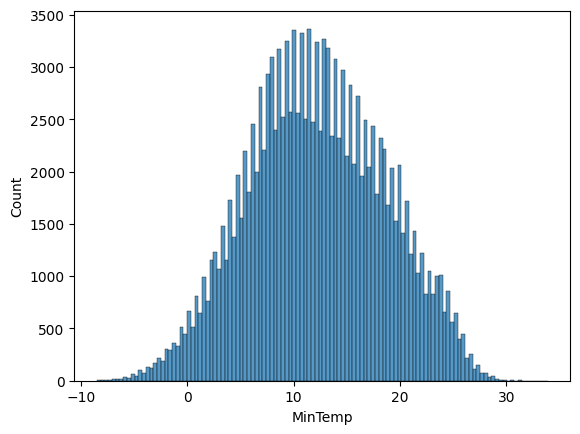

In [10]:
sns.histplot(X['MinTemp'])

/tmp/ipykernel_26/474298574.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['MaxTemp'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MaxTemp', ylabel='Density'>

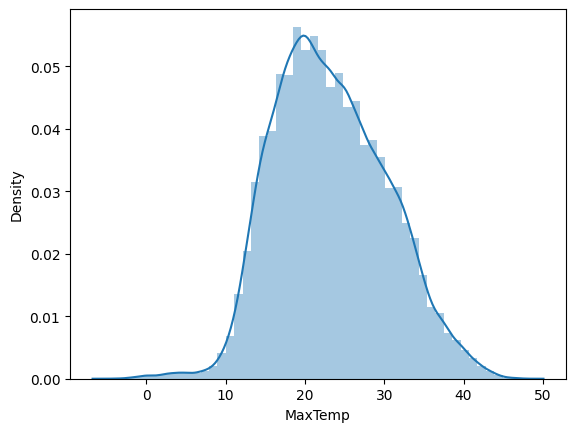

In [11]:
sns.distplot(X['MaxTemp'])

<Axes: xlabel='MinTemp', ylabel='Rainfall'>

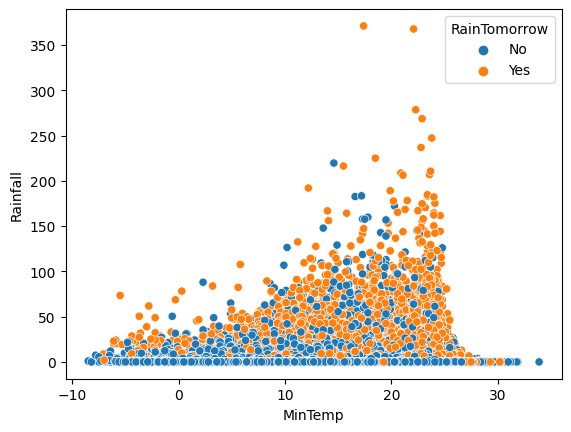

In [12]:
sns.scatterplot(x=X['MinTemp'],y=X['Rainfall'],hue=y)

<Axes: xlabel='MaxTemp', ylabel='Rainfall'>

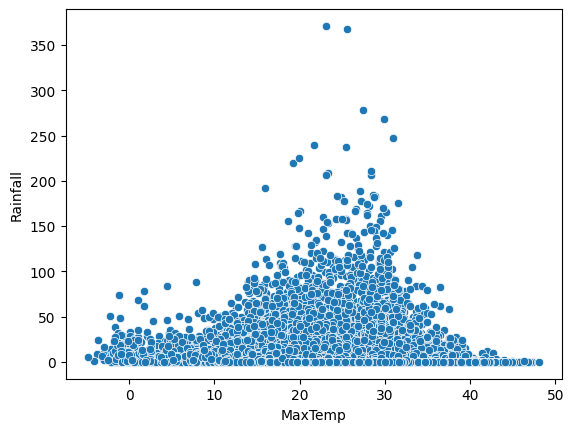

In [13]:
sns.scatterplot(x=X['MaxTemp'],y=X['Rainfall'])

<Axes: xlabel='Pressure9am', ylabel='Rainfall'>

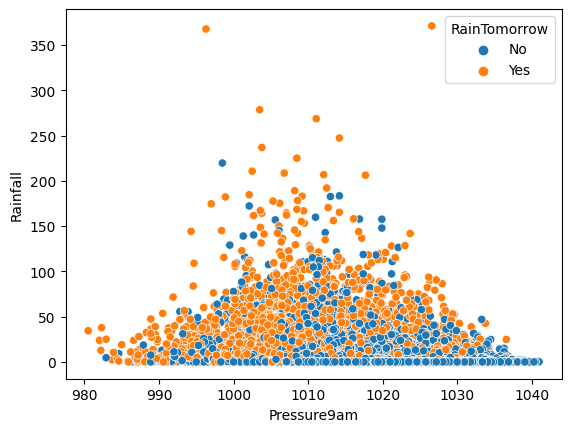

In [14]:
sns.scatterplot(x=X['Pressure9am'],y=X['Rainfall'],hue=y)

<Axes: xlabel='Pressure3pm', ylabel='Rainfall'>

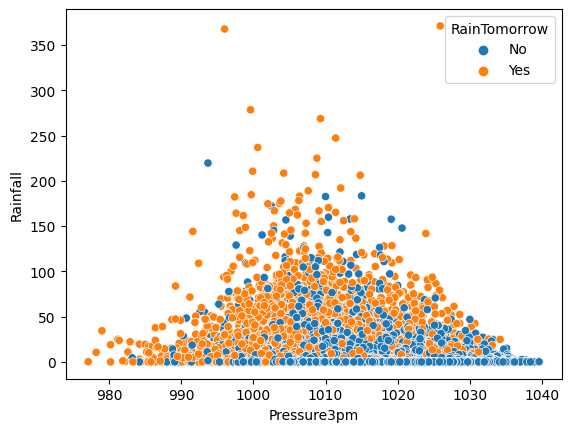

In [15]:
sns.scatterplot(x=X['Pressure3pm'],y=X['Rainfall'],hue=y)

<Axes: xlabel='WindGustSpeed', ylabel='Rainfall'>

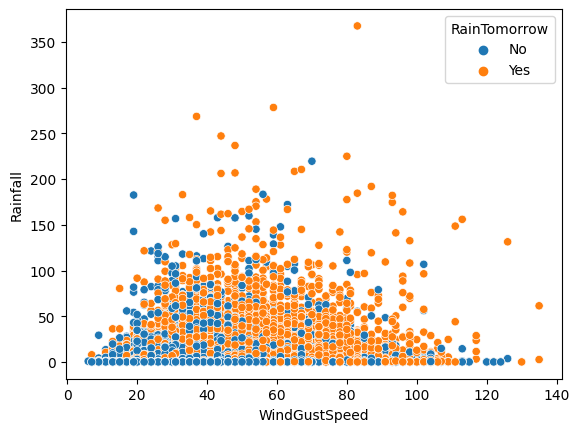

In [16]:
sns.scatterplot(x=X['WindGustSpeed'],y=X['Rainfall'],hue=y)

In [17]:
location=df['Location'].unique()
total=[]
for loc in location:
        total.append(df[df['Location'] == loc]['Rainfall'].sum().round())
len(total)

49

<Axes: >

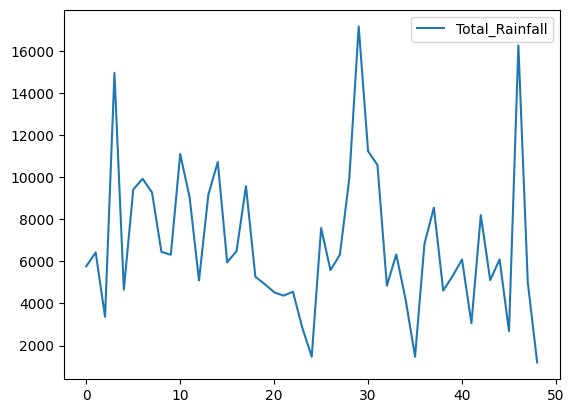

In [18]:
r_df=pd.DataFrame({'Location':location,'Total_Rainfall':total})
r_df.plot()

<Axes: xlabel='Total_Rainfall', ylabel='Location'>

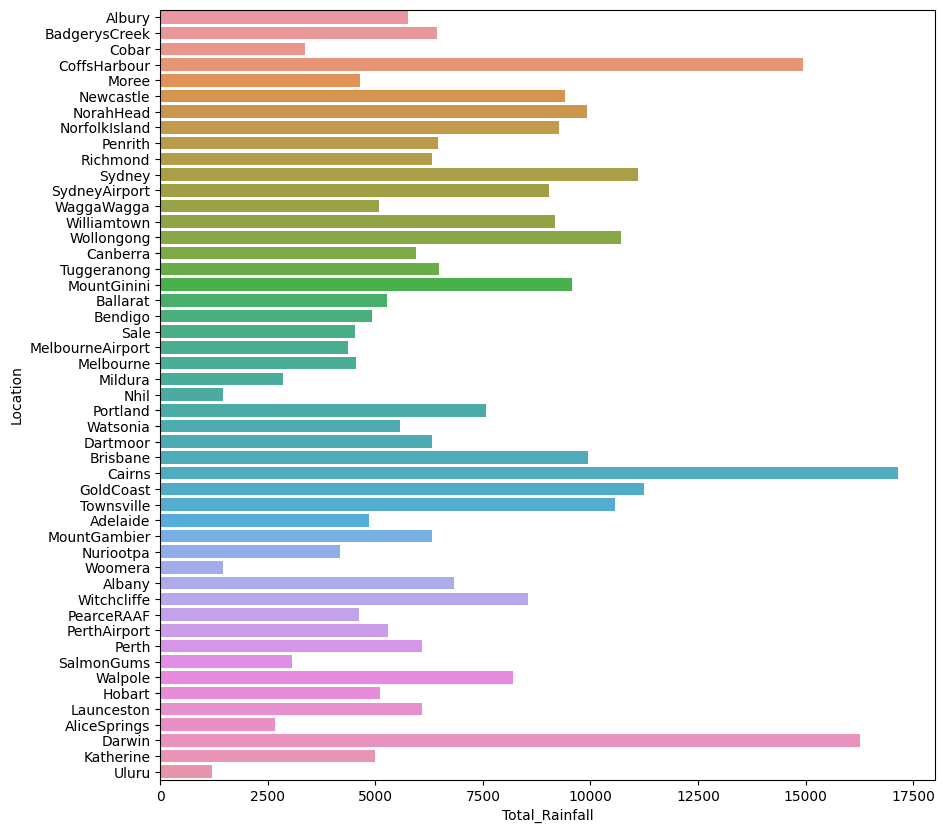

In [19]:
plt.figure(figsize=(10, 10))
sns.barplot(y=r_df['Location'],x=r_df['Total_Rainfall'])

<Axes: xlabel='Rainfall', ylabel='Location'>

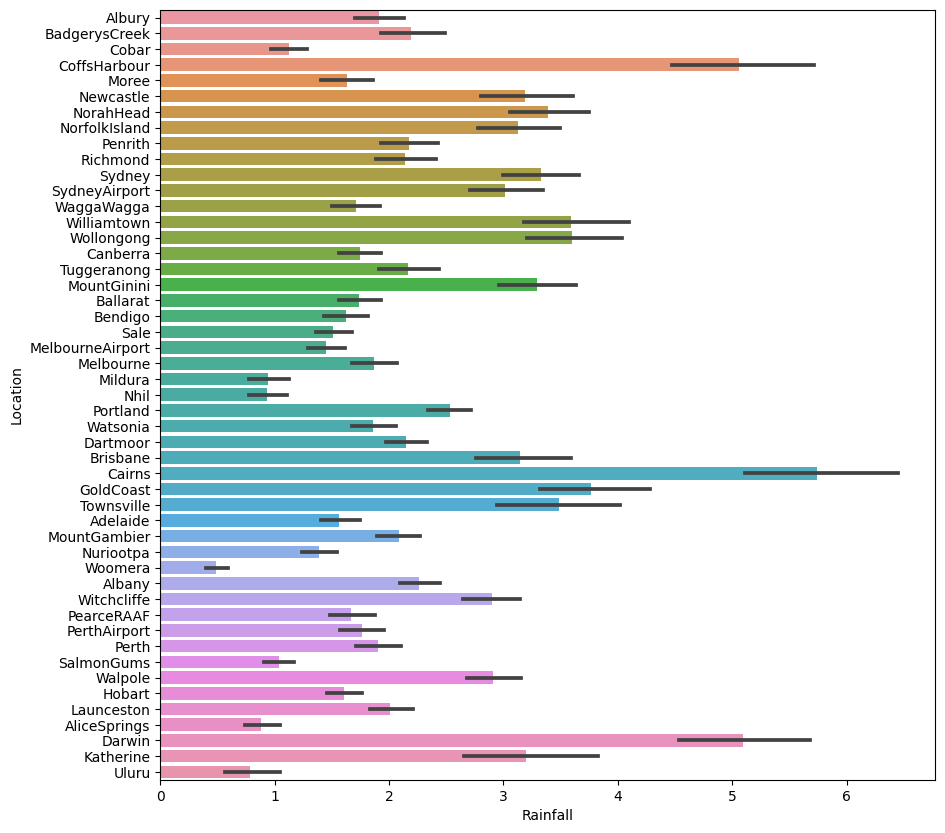

In [20]:
plt.figure(figsize=(10, 10))
sns.barplot(y=X['Location'],x=X['Rainfall'])

<Axes: xlabel='WindGustDir', ylabel='Rainfall'>

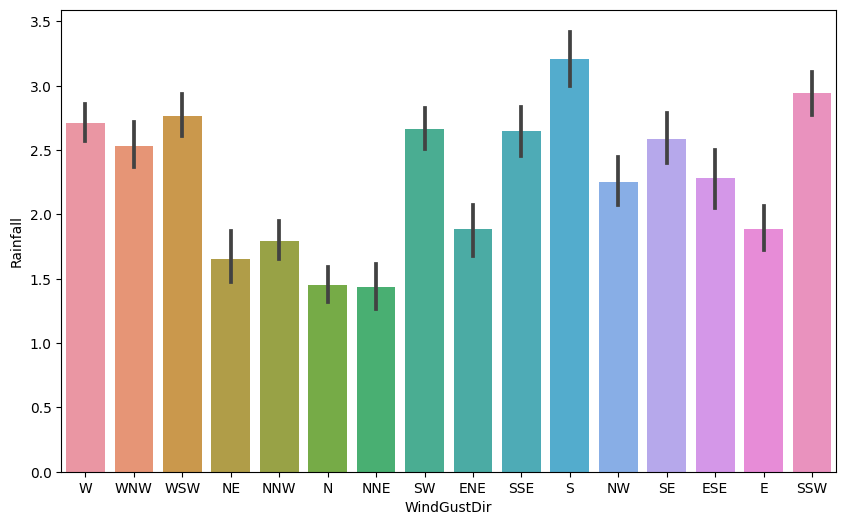

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x=X['WindGustDir'],y=X['Rainfall'])

In [22]:
corr=X[['MinTemp','MaxTemp','Temp9am','Temp3pm','Cloud9am','Cloud3pm','Pressure3pm','Pressure9am','Humidity9am','Humidity3pm','WindSpeed9am'
      ,'WindSpeed3pm','Sunshine','Rainfall','Evaporation']].corr()
corr

,MinTemp,MaxTemp,Temp9am,Temp3pm,Cloud9am,Cloud3pm,Pressure3pm,Pressure9am,Humidity9am,Humidity3pm,WindSpeed9am,WindSpeed3pm,Sunshine,Rainfall,Evaporation
MinTemp,1.000000,0.736555,0.901821,0.708906,0.078754,0.021605,-0.461292,-0.450970,-0.232899,0.006089,0.175064,0.175173,0.072586,0.103938,0.466993
MaxTemp,0.736555,1.000000,0.887210,0.984503,-0.289370,-0.277921,-0.427167,-0.332061,-0.504110,-0.508855,0.014450,0.050300,0.470156,-0.074992,0.587932
Temp9am,0.901821,0.887210,1.000000,0.860591,-0.136959,-0.126659,-0.470187,-0.422556,-0.471354,-0.221019,0.128545,0.163030,0.291188,0.011192,0.545115
Temp3pm,0.708906,0.984503,0.860591,1.000000,-0.302060,-0.317420,-0.389548,-0.286770,-0.498399,-0.557841,0.004569,0.027778,0.490501,-0.079657,0.572893
Cloud9am,0.078754,-0.289370,-0.136959,-0.302060,1.000000,0.603564,-0.060772,-0.129796,0.452297,0.517120,0.025112,0.053337,-0.675323,0.198528,-0.183793
Cloud3pm,0.021605,-0.277921,-0.126659,-0.317420,0.603564,1.000000,-0.084778,-0.147861,0.357326,0.523120,0.054639,0.025396,-0.703930,0.172403,-0.182618
Pressure3pm,-0.461292,-0.427167,-0.470187,-0.389548,-0.060772,-0.084778,1.000000,0.961326,0.186858,0.051997,-0.175817,-0.255439,-0.019719,-0.126534,-0.293581
Pressure9am,-0.450970,-0.332061,-0.422556,-0.286770,-0.129796,-0.147861,0.961326,1.000000,0.139442,-0.027544,-0.228743,-0.296351,0.041970,-0.168154,-0.270362
Humidity9am,-0.232899,-0.504110,-0.471354,-0.498399,0.452297,0.357326,0.186858,0.139442,1.000000,0.666949,-0.270858,-0.145525,-0.490819,0.224405,-0.504092
Humidity3pm,0.006089,-0.508855,-0.221019,-0.557841,0.517120,0.523120,0.051997,-0.027544,0.666949,1.000000,-0.031614,0.016432,-0.629130,0.255755,-0.390243


<Axes: >

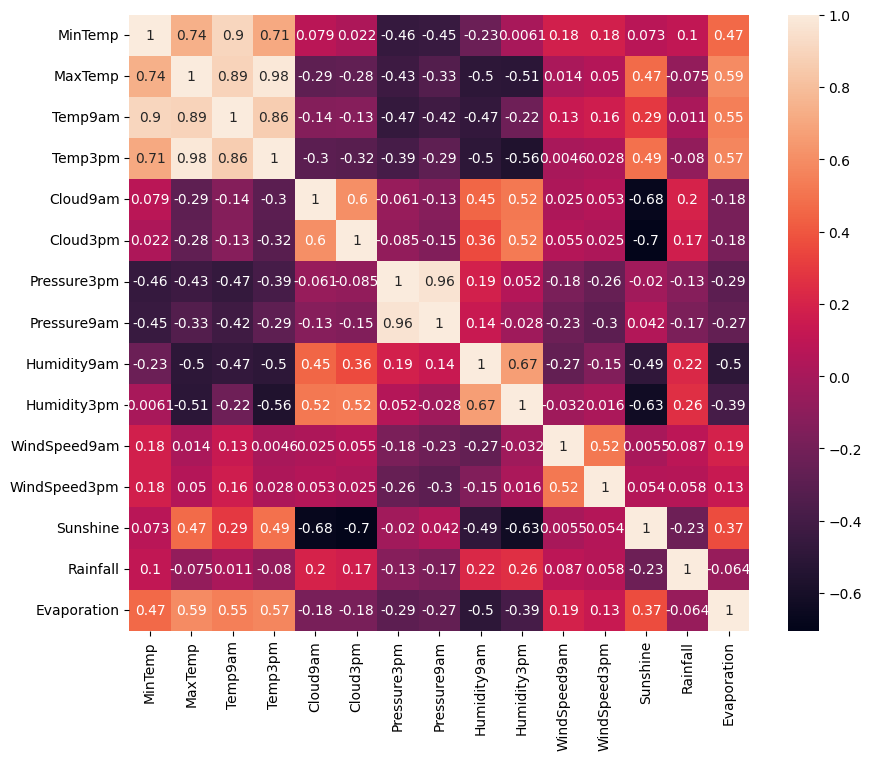

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

<Axes: xlabel='Humidity9am', ylabel='Rainfall'>

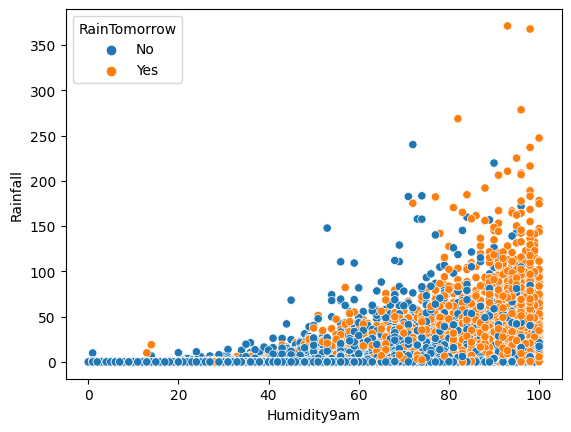

In [24]:
sns.scatterplot(x=X['Humidity9am'],y=X['Rainfall'],hue=y)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='WindSpeed3pm', ylabel='Rainfall'>

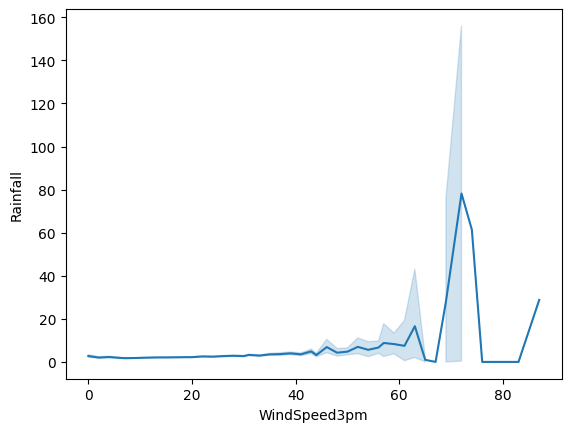

In [25]:
sns.lineplot(x=X['WindSpeed3pm'],y=X['Rainfall'])

In [26]:
X['Clouds']=round((X['Cloud9am']+X['Cloud3pm'])/2)
X['Clouds'].value_counts()

Clouds
6.0    14327
4.0    13969
8.0    12077
2.0    10486
7.0     9863
0.0     7004
1.0     6228
5.0     4420
3.0     3584
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: xlabel='Clouds', ylabel='Rainfall'>

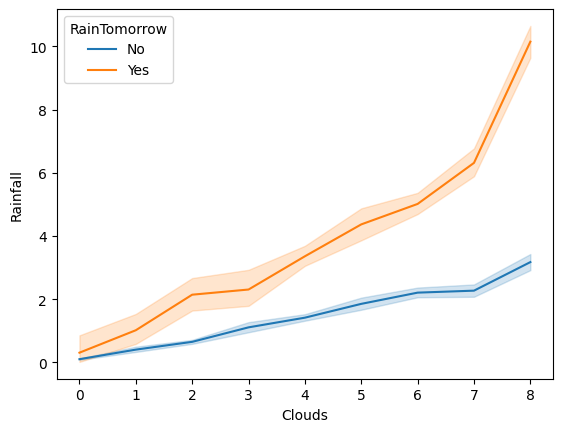

In [27]:
sns.lineplot(x=X['Clouds'],y=X['Rainfall'],hue=y)

<Axes: xlabel='WindDir9am', ylabel='Rainfall'>

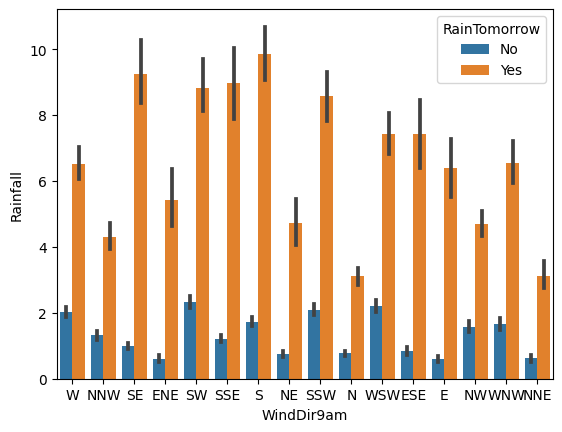

In [28]:
sns.barplot(x=X['WindDir9am'],y=X['Rainfall'],hue=y)

<Axes: xlabel='Month', ylabel='Rainfall'>

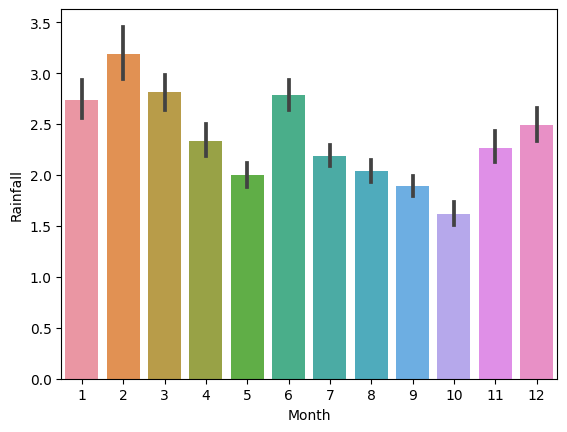

In [29]:
sns.barplot(x=X['Month'],y=X['Rainfall'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Rainfall'>

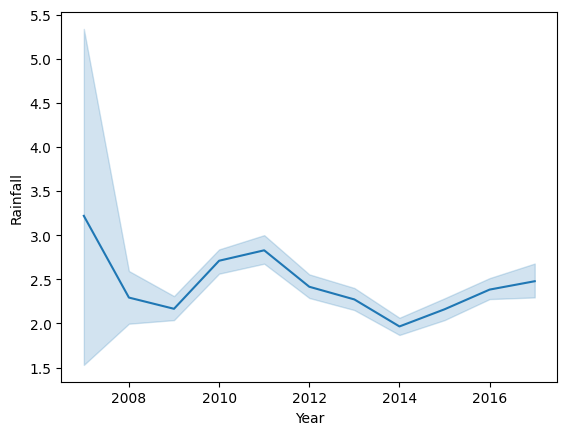

In [30]:
sns.lineplot(x=X['Year'],y=X['Rainfall'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: xlabel='Sunshine', ylabel='Rainfall'>

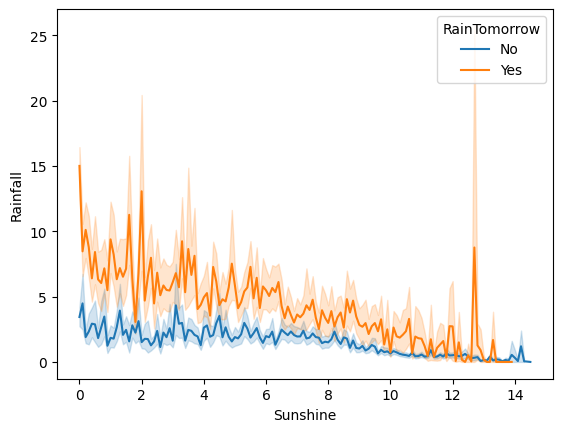

In [31]:
sns.lineplot(x=X['Sunshine'],y=X['Rainfall'],hue=y)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: xlabel='Evaporation', ylabel='Rainfall'>

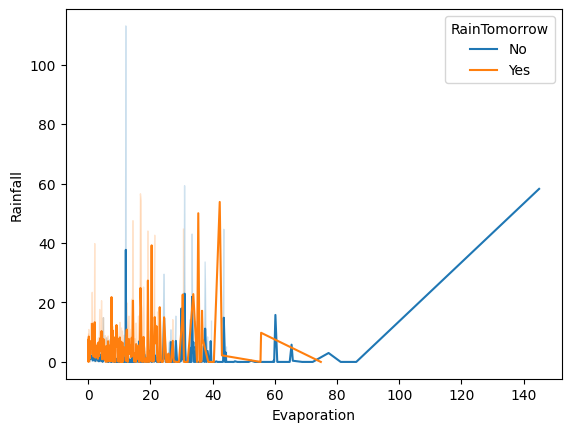

In [32]:
sns.lineplot(x=X['Evaporation'],y=X['Rainfall'],hue=y)

# ** Valuable Insights**
1.Lower levels of sunshine have more probability of rainfall

2.More Cloudy it is today, more the possibility of raining tomorrow. Also amount of rain fall is more

3.More the Humidity, More is the rainfall

4.Rainfall is comparatively less when WindGustDirection is north oriented

5.If Wind Speed is between 50 & 90, probability of rainfall is more

6.Amount of Rainfall is more if the Pressure is in range of 1000-1020

7.If MinTemp is b/w 10-25, and MaxTemp b/w 20-30, rainfall is more

8.Evaporation must be below 25. If greater than 80 today, there is surely no rainfall tomorrow

8.Places like Woomera,Mildura,Nhil,Uluru have less rainfall

In [33]:
X.drop(columns='Clouds',axis=1,inplace=True)

# Feature Engineering

In [34]:
# Get list of neumeric variables
t = (df.dtypes == "float64") | (df.dtypes == "int32")
num_cols = list(t[t].index)
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [35]:
# Get list of categorical variables
s = (df.dtypes == "object")
object_cols = list(s[s].index)
object_cols=object_cols[1:-1]
object_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [37]:
X_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
17777,Newcastle,13.4,25.5,0.0,NaN,NaN,NaN,NaN,NW,NaN,...,NaN,NaN,1.0,NaN,16.0,NaN,No,2016,7,22
53818,MountGinini,15.4,27.3,0.0,NaN,NaN,SW,46.0,W,W,...,NaN,NaN,NaN,NaN,20.7,26.4,No,2013,12,20
129061,Walpole,13.2,18.4,1.6,NaN,NaN,S,17.0,NaN,SSE,...,1030.1,1028.9,NaN,NaN,15.2,17.4,Yes,2015,5,11
94405,Townsville,26.9,32.4,0.0,5.4,7.4,NE,33.0,NaN,ENE,...,1004.5,1001.0,7.0,6.0,30.1,31.7,No,2012,1,30
36543,WaggaWagga,25.6,36.9,0.0,16.8,10.1,W,48.0,W,WSW,...,1008.6,1009.0,1.0,4.0,32.4,35.0,No,2009,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24569,Penrith,19.9,28.4,0.2,NaN,NaN,SSW,39.0,SSW,SSE,...,NaN,NaN,NaN,NaN,24.5,25.8,No,2010,2,16
124072,SalmonGums,1.5,18.4,0.0,NaN,NaN,W,35.0,W,W,...,NaN,NaN,NaN,NaN,11.4,18.1,No,2009,8,30
93620,Townsville,22.6,30.4,0.2,9.6,9.5,ENE,54.0,ESE,ENE,...,1015.7,1013.9,7.0,7.0,26.0,28.8,No,2009,11,6
94664,Townsville,16.5,29.4,0.0,11.2,11.3,E,52.0,ESE,ENE,...,1021.8,1019.0,1.0,1.0,26.1,27.2,No,2012,10,15


In [38]:
X_test

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
145030,Uluru,15.6,30.7,0.0,NaN,NaN,SE,33.0,SE,SE,...,1023.8,1019.5,1.0,NaN,20.6,29.4,No,2016,4,22
92390,GoldCoast,25.3,32.2,0.0,NaN,NaN,ESE,28.0,E,E,...,1009.3,1006.8,NaN,NaN,30.1,31.1,No,2015,1,18
59199,Bendigo,9.6,20.3,0.2,NaN,NaN,SE,54.0,SSE,SSE,...,1020.4,1020.5,6.0,2.0,13.4,19.4,No,2011,11,23
131658,Hobart,10.2,13.9,2.4,3.6,0.2,SSW,46.0,S,SSE,...,1011.1,1012.3,NaN,NaN,10.3,10.4,Yes,2013,9,22
16355,Newcastle,6.7,17.0,0.0,NaN,NaN,NaN,NaN,NW,NaN,...,NaN,NaN,1.0,4.0,10.8,14.2,No,2012,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37455,WaggaWagga,0.7,15.7,0.0,1.0,4.4,ENE,22.0,E,E,...,1026.1,1022.2,5.0,7.0,8.7,15.1,No,2011,8,15
59727,Bendigo,10.1,15.9,0.0,0.6,NaN,WNW,35.0,WNW,WNW,...,1025.2,1023.0,8.0,1.0,10.6,14.8,No,2013,7,2
136361,AliceSprings,18.3,23.3,0.4,13.2,2.8,SW,56.0,S,ENE,...,1019.0,1017.5,7.0,8.0,21.7,19.6,No,2009,9,17
80292,Watsonia,1.7,16.9,0.0,4.2,6.4,N,67.0,NE,NNE,...,1026.8,1021.3,7.0,7.0,12.6,15.4,No,2015,7,21


In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

**Imputation**

In [40]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
X_train[num_cols]=imputer.fit_transform(X_train[num_cols])
X_test[num_cols]=imputer.transform(X_test[num_cols])

In [41]:
imputer=SimpleImputer(strategy='most_frequent')
X_train[object_cols]=imputer.fit_transform(X_train[object_cols])
X_test[object_cols]=imputer.transform(X_test[object_cols])

**Scaling**

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])
X_test[num_cols]=scaler.transform(X_test[num_cols])

**Encoding**

In [43]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore',drop='first')
encoder.fit(df[object_cols])
encoded_cols = list(encoder.get_feature_names_out(object_cols))
X_train[encoded_cols] = encoder.transform(X_train[object_cols])
X_test[encoded_cols] = encoder.transform(X_test[object_cols])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/tmp/ipykernel_26/2497544305.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[encoded_cols] = encoder.transform(X_train[object_cols])
/tmp/ipykernel_26/2497544305.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[encoded_cols] = encoder.transf

In [44]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_test=encoder.transform(y_test)

# Model Building

In [45]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout
import keras_tuner as kt

In [46]:
model=Sequential()

In [47]:
X_train.drop(columns=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday'],inplace=True)

In [48]:
X_test.drop(columns=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday'],inplace=True)

In [49]:
from keras import callbacks
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, 
    patience=15,
    restore_best_weights=True,
)

In [50]:
model.add(Dense(units =128, kernel_initializer = 'he_normal',kernel_regularizer=tf.keras.regularizers.l2(0.03), activation = 'relu', input_dim = 117))
model.add(Dense(units = 64, kernel_initializer = 'he_normal',kernel_regularizer=tf.keras.regularizers.l2(0.03), activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(units = 32, kernel_initializer = 'he_normal',kernel_regularizer=tf.keras.regularizers.l2(0.03), activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'he_normal',kernel_regularizer=tf.keras.regularizers.l2(0.03), activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'he_normal', activation = 'sigmoid'))

In [51]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [52]:
model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test),callbacks=[early_stopping])

Epoch 1/100


I0000 00:00:1706960170.796003      69 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3637/3637 [==============================] - 19s 4ms/step - loss: 3.0228 - accuracy: 0.7467 - val_loss: 1.3290 - val_accuracy: 0.7586
Epoch 2/100
3637/3637 [==============================] - 15s 4ms/step - loss: 0.8738 - accuracy: 0.7583 - val_loss: 0.6201 - val_accuracy: 0.7586
Epoch 3/100
3637/3637 [==============================] - 15s 4ms/step - loss: 0.5869 - accuracy: 0.7584 - val_loss: 0.5767 - val_accuracy: 0.7586
Epoch 4/100
3637/3637 [==============================] - 15s 4ms/step - loss: 0.5775 - accuracy: 0.7584 - val_loss: 0.5766 - val_accuracy: 0.7586
Epoch 5/100
3637/3637 [==============================] - 15s 4ms/step - loss: 0.5775 - accuracy: 0.7584 - val_loss: 0.5766 - val_accuracy: 0.7586
Epoch 6/100
3637/3637 [==============================] - 15s 4ms/step - loss: 0.5775 - accuracy: 0.7584 - val_loss: 0.5766 - val_accuracy: 0.7586
Epoch 7/100
3637/3637 [==============================] - 15s 4ms/step - loss: 0.5775 - accuracy: 0.7584 - val_loss: 0.5767 - val_accurac

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               15104     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 264       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0

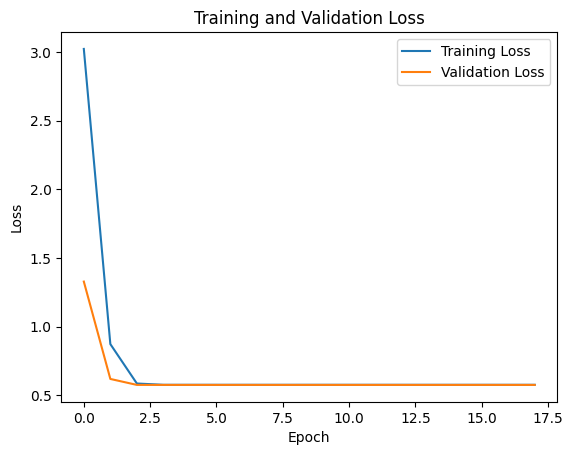

In [54]:
history=model.history.history
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

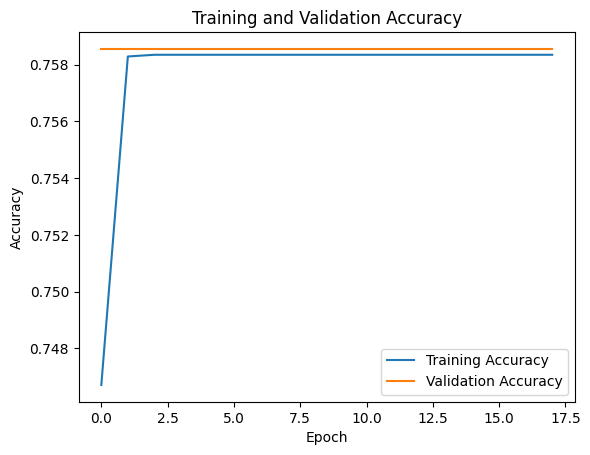

In [55]:
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Confusion Matrix**

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [57]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

910/910 [==============================] - 1s 1ms/step


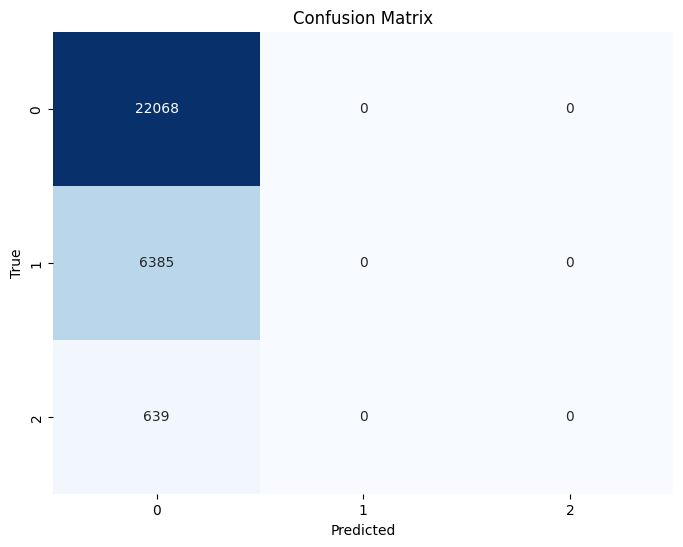

In [58]:
cf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     22068
           1       0.00      0.00      0.00      6385
           2       0.00      0.00      0.00       639

    accuracy                           0.76     29092
   macro avg       0.25      0.33      0.29     29092
weighted avg       0.58      0.76      0.65     29092



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

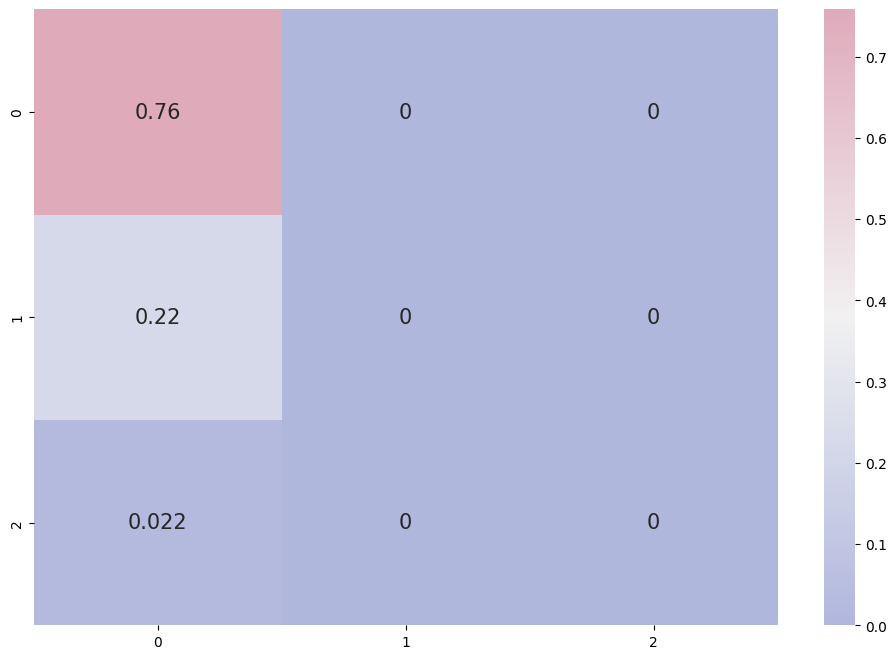

In [60]:
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

# End